In [1]:
%config Completer.use_jedi = False

In [85]:
import numpy as np
from scipy.special import erfinv
from scipy.stats import probplot
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt

# Create dataset

In [55]:
datapoints = 10000
modes = 3
z = np.random.randn(datapoints, modes) * [3.,1.2,2.] + [-5, 0.0, 2.5]
mask = np.random.randint(0, modes, datapoints).flatten()
data = z[range(len(z)), mask]

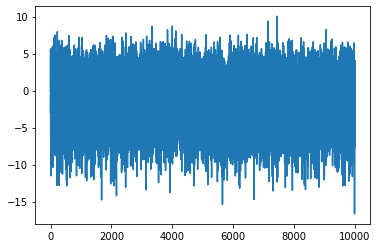

In [56]:
plt.plot(data)

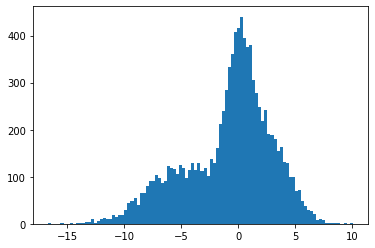

In [57]:
plt.hist(data, bins=100);

# QuantileTransformer

In [61]:
trsf = QuantileTransformer(output_distribution='normal')
data_qt = trsf.fit_transform(data.reshape((-1,1)))

In [96]:
np.mean(data_qt), np.std(data_qt)

(4.839035779911143e-05, 1.0008795484402377)

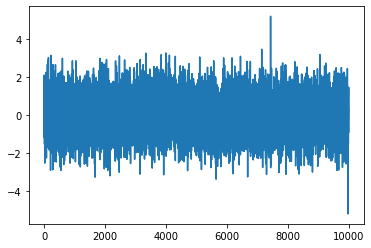

In [65]:
plt.plot(data_qt)

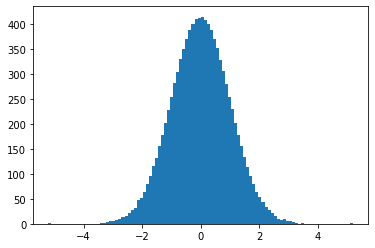

In [66]:
plt.hist(data_qt, bins=100);

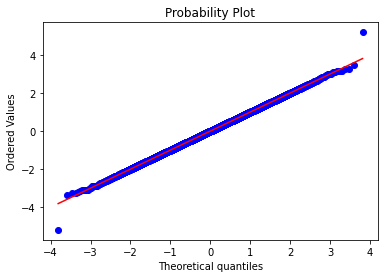

In [92]:
probplot(data_qt.flatten(), plot=plt); plt.show()

# GaussRank transform

In [73]:
# rank the data and convert to [-1,1]
ranked = 2 * np.argsort(data) / len(data) - 1.0
# use inverse error function to conver to a Gaussian
inverted = erfinv(ranked)

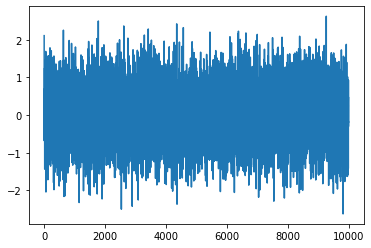

In [74]:
plt.plot(inverted)

In [80]:
inverted2 = inverted[np.abs(inverted) < np.inf]

In [95]:
np.mean(inverted2), np.std(inverted2)

(7.816751768537955e-18, 0.7065299249811452)

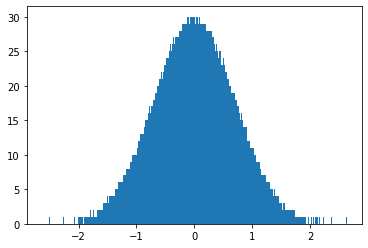

In [83]:
plt.hist(inverted2, bins=1000);

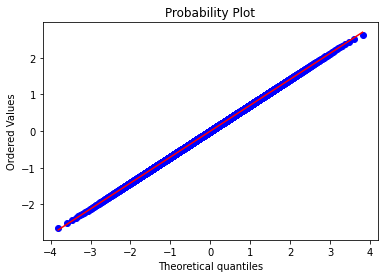

In [93]:
probplot(inverted2.flatten(), plot=plt); plt.show()

## Test probplot

In [97]:
bb = np.random.randn(10000) * 2.0 + 10.0

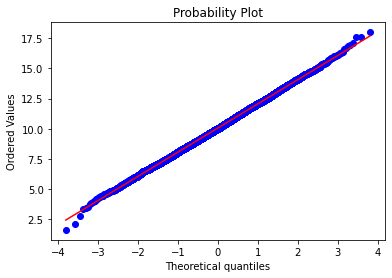

In [98]:
probplot(bb, plot=plt); plt.show()